In [3]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import graphviz

In [4]:
data = pd.read_csv('HEART.csv')


In [5]:
print(data)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

In [10]:
df = pd.DataFrame(data)

print(df.head(15))

    Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0    40   M           ATA        140          289          0     Normal   
1    49   F           NAP        160          180          0     Normal   
2    37   M           ATA        130          283          0         ST   
3    48   F           ASY        138          214          0     Normal   
4    54   M           NAP        150          195          0     Normal   
5    39   M           NAP        120          339          0     Normal   
6    45   F           ATA        130          237          0     Normal   
7    54   M           ATA        110          208          0     Normal   
8    37   M           ASY        140          207          0     Normal   
9    48   F           ATA        120          284          0     Normal   
10   37   F           NAP        130          211          0     Normal   
11   58   M           ATA        136          164          0         ST   
12   39   M           ATA

In [11]:
from sklearn import tree

In [12]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming 'Age', 'Sex', 'ChestPainType', ... are your feature columns and 'HeartDisease' is your target column
X = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]
y = df['HeartDisease']

# Perform one-hot encoding on categorical features
categorical_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
X_categorical = pd.get_dummies(X[categorical_cols], drop_first=True)

# Combine one-hot encoded features with numerical features
X_processed = pd.conc at([X.drop(columns=categorical_cols), X_categorical], axis=1)

# Train the decision tree model
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_processed, y)


[Text(0.4943181818181818, 0.9166666666666666, 'x[14] <= 0.5\ngini = 0.494\nsamples = 918\nvalue = [410, 508]'),
 Text(0.2840909090909091, 0.75, 'x[3] <= 150.5\ngini = 0.292\nsamples = 523\nvalue = [93, 430]'),
 Text(0.14772727272727273, 0.5833333333333334, 'x[6] <= 0.5\ngini = 0.214\nsamples = 436\nvalue = [53, 383]'),
 Text(0.09090909090909091, 0.4166666666666667, 'x[1] <= 131.0\ngini = 0.475\nsamples = 54\nvalue = [21, 33]'),
 Text(0.045454545454545456, 0.25, 'x[12] <= 0.5\ngini = 0.483\nsamples = 27\nvalue = [16, 11]'),
 Text(0.022727272727272728, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.06818181818181818, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.13636363636363635, 0.25, 'x[11] <= 0.5\ngini = 0.302\nsamples = 27\nvalue = [5, 22]'),
 Text(0.11363636363636363, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.1590909090909091, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.20454545454545456, 0.4166666666666667, 'x[1] <= 86.0\ngini = 0.154\nsamples = 382\nvalue = [32, 350]'),


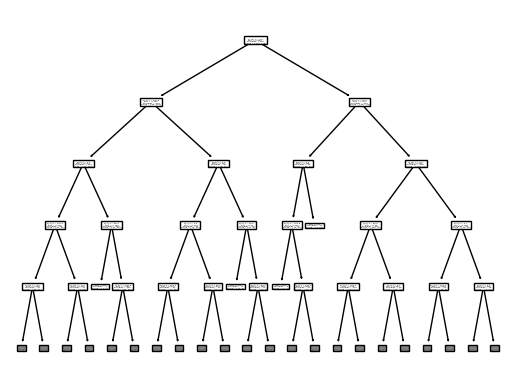

In [15]:
tree.plot_tree(clf, max_depth=4)

In [17]:
from sklearn.tree import export_graphviz
import graphviz


In [19]:
dot_data = export_graphviz(clf, out_file=None, feature_names=X_processed.columns, class_names=['0', '1'], filled=True, rounded=True)

In [20]:
graph = graphviz.Source(dot_data)

In [21]:
graph.render('decision_tree', view=True)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH